# **PROYECTO FINAL**

Victor Jahaziel Garza Muñoz 2001180

Mauricio Alejandro Olivares Mata 1973006

**Análisis de Radiografia de Torax Sano**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

<ipython-input-2-3fad6e05da30>:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


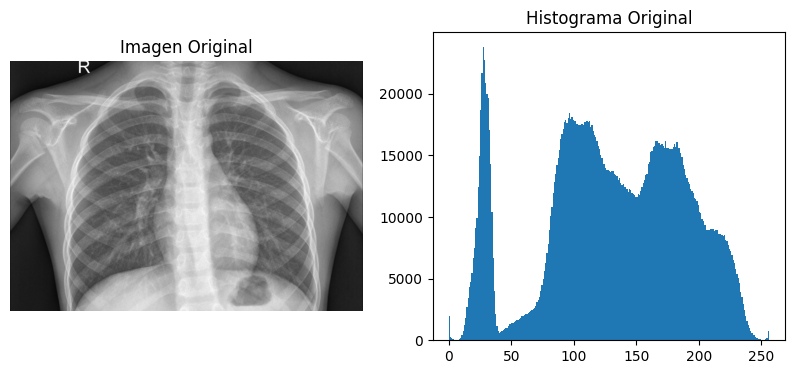

In [ ]:
# Cargar imagen médica en escala de grises
img = cv2.imread('Normal1.jpeg', cv2.IMREAD_GRAYSCALE)

# Mostrar imagen original
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

# Histograma original
plt.subplot(1, 2, 2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Histograma Original")
plt.show()


<ipython-input-3-bf1c4a7c56bd>:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_eq.ravel(), 256, [0, 256])


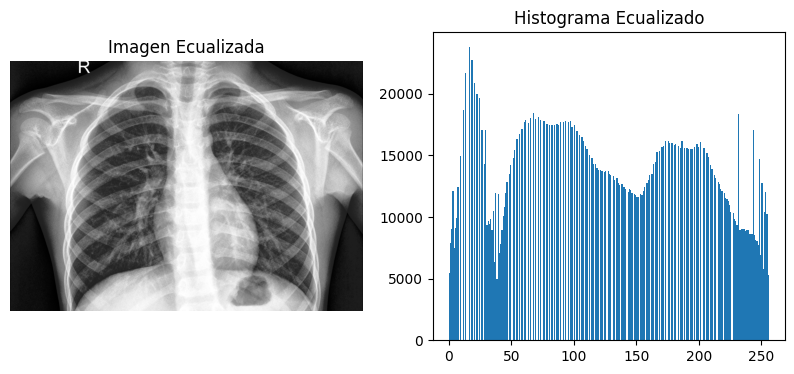

In [ ]:
# Ecualización de histograma
img_eq = cv2.equalizeHist(img)

# Mostrar imagen ecualizada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_eq, cmap='gray')
plt.title("Imagen Ecualizada")
plt.axis('off')

# Histograma ecualizado
plt.subplot(1, 2, 2)
plt.hist(img_eq.ravel(), 256, [0, 256])
plt.title("Histograma Ecualizado")
plt.show()


Resta entre imagen original y suavizada para resaltar bordes


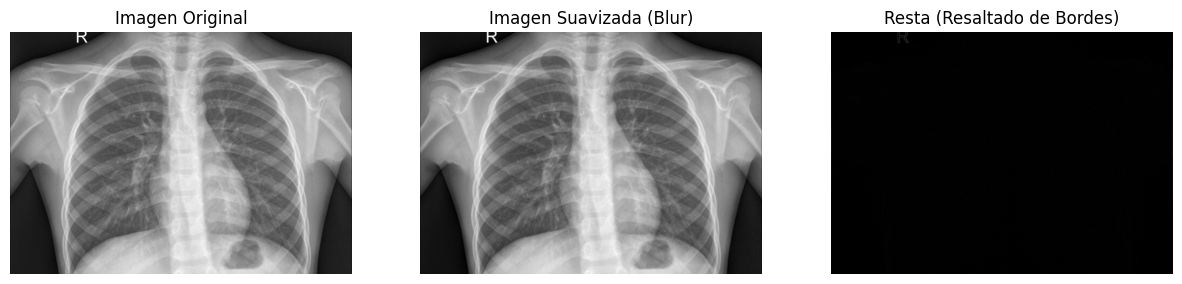

In [ ]:
# Suavizar la imagen con filtro Gaussiano
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Resta entre la imagen original y la suavizada
img_bordes = cv2.subtract(img, img_blur)

# Mostrar resultados
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_blur, cmap='gray')
plt.title("Imagen Suavizada (Blur)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_bordes, cmap='gray')
plt.title("Resta (Resaltado de Bordes)")
plt.axis('off')

plt.show()


Aplicación de máscaras binarias usando operaciones lógicas

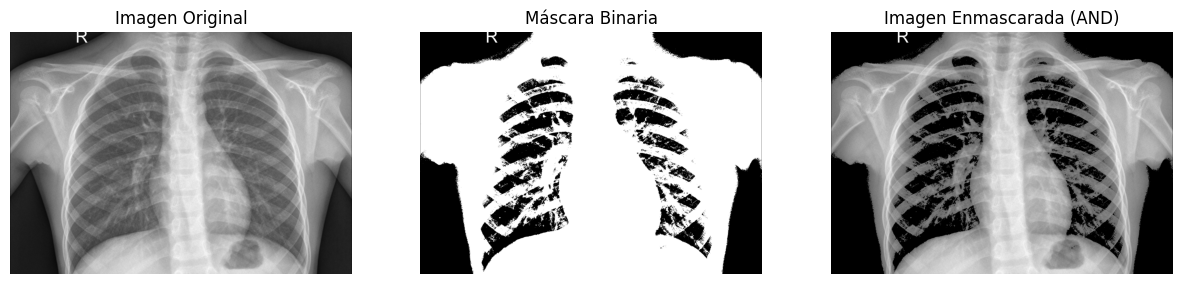

In [ ]:
# Crear una máscara binaria: por ejemplo, umbral fijo
_, mascara_binaria = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Aplicar una operación lógica AND para conservar solo zonas con máscara
img_enmascarada = cv2.bitwise_and(img, img, mask=mascara_binaria)

# Mostrar resultados
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mascara_binaria, cmap='gray')
plt.title("Máscara Binaria")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_enmascarada, cmap='gray')
plt.title("Imagen Enmascarada (AND)")
plt.axis('off')

plt.show()


Filtro de Media

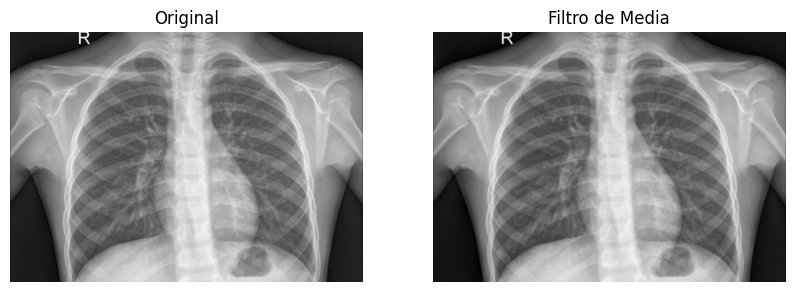

In [ ]:
# Filtro de media (kernel 5x5)
img_media = cv2.blur(img, (5, 5))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_media, cmap='gray')
plt.title("Filtro de Media")
plt.axis('off')
plt.show()


Filtro Gaussiano

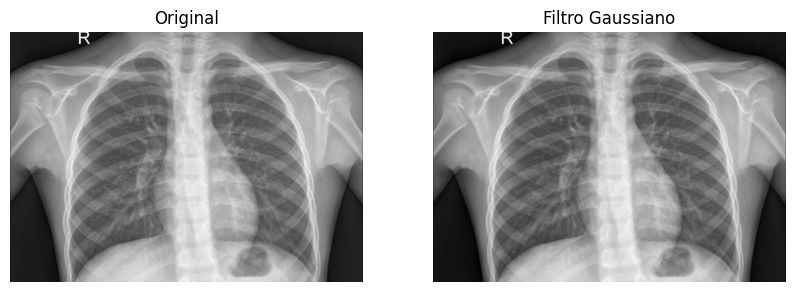

In [ ]:
# Filtro Gaussiano (más suave y natural que el de media)
img_gauss = cv2.GaussianBlur(img, (5, 5), 0)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gauss, cmap='gray')
plt.title("Filtro Gaussiano")
plt.axis('off')
plt.show()


Filtro Laplaciano

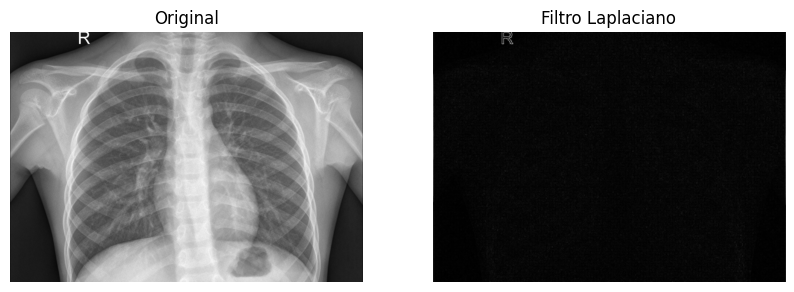

In [ ]:
# Filtro Laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # Para visualizar mejor

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title("Filtro Laplaciano")
plt.axis('off')
plt.show()


Filtro Sobel

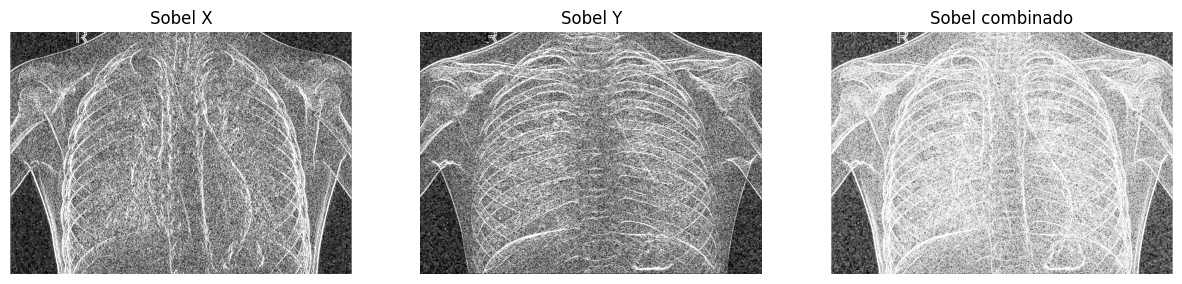

In [ ]:
# Filtro Sobel en X y Y
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Magnitud del gradiente (combinación)
sobel_comb = cv2.magnitude(sobelx, sobely)
sobel_comb = cv2.convertScaleAbs(sobel_comb)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_comb, cmap='gray')
plt.title("Sobel combinado")
plt.axis('off')

plt.show()


Umbral Fijo

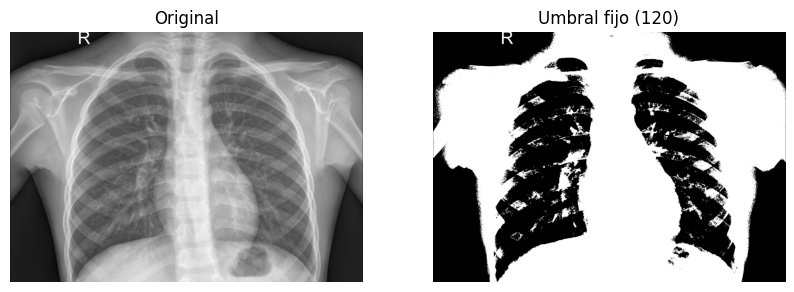

In [ ]:
# Umbral fijo (ejemplo con valor 120)
_, img_thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_thresh, cmap='gray')
plt.title("Umbral fijo (120)")
plt.axis('off')
plt.show()


Umbral adaptativo

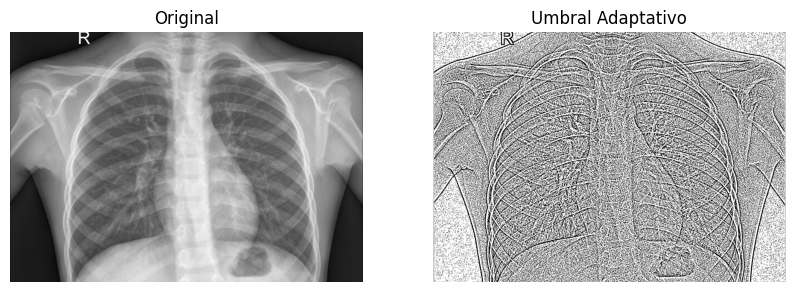

In [ ]:
# Umbral adaptativo (media local)
img_adapt = cv2.adaptiveThreshold(img, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,
                                  11, 2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_adapt, cmap='gray')
plt.title("Umbral Adaptativo")
plt.axis('off')
plt.show()


Control deslizante interactivo (en tiempo real)

In [ ]:
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

# Función que actualiza el umbral dinámicamente
def actualizar_umbral(thresh_value):
    _, img_binaria = cv2.threshold(img, thresh_value, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_binaria, cmap='gray')
    plt.title(f'Umbral = {thresh_value}')
    plt.axis('off')

    plt.show()

# Control deslizante interactivo
interact(actualizar_umbral, thresh_value=IntSlider(min=0, max=255, step=1, value=128))


interactive(children=(IntSlider(value=128, description='thresh_value', max=255), Output()), _dom_classes=('wid…

<function __main__.actualizar_umbral(thresh_value)>

Mostrar la magnitud del espectro de Fourier


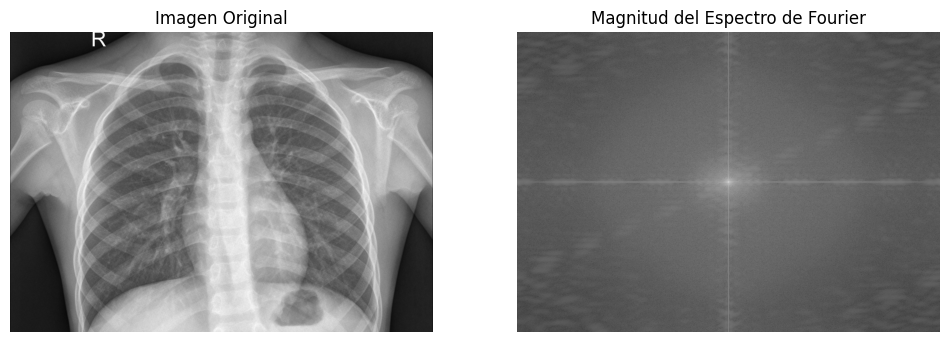

In [ ]:
# Transformada de Fourier en 2D
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Centramos el espectro
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Escalado logarítmico para visualización

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitud del Espectro de Fourier")
plt.axis('off')
plt.show()


Filtro en dominio de la frecuencia: eliminación de alta frecuencia

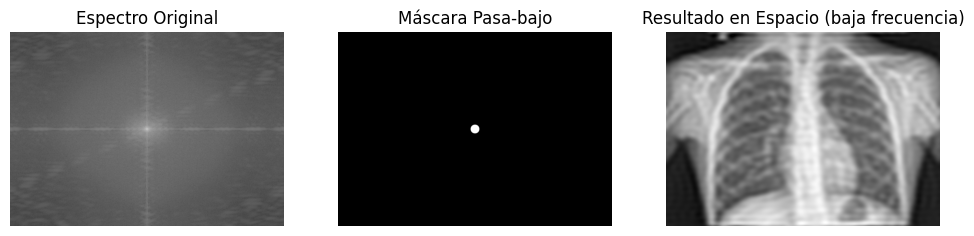

In [ ]:
# Creamos una máscara pasa-bajo (círculo central blanco)
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
r = 30  # radio del filtro pasa-bajo
cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

# Aplicamos la máscara al espectro
fshift_filtered = fshift * mask

# Transformamos de vuelta al dominio espacial
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Espectro Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask * 255, cmap='gray')
plt.title("Máscara Pasa-bajo")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title("Resultado en Espacio (baja frecuencia)")
plt.axis('off')

plt.show()


**Análisis de Radiografía de torax con Pneumonia**

<ipython-input-36-b0276bae6baa>:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


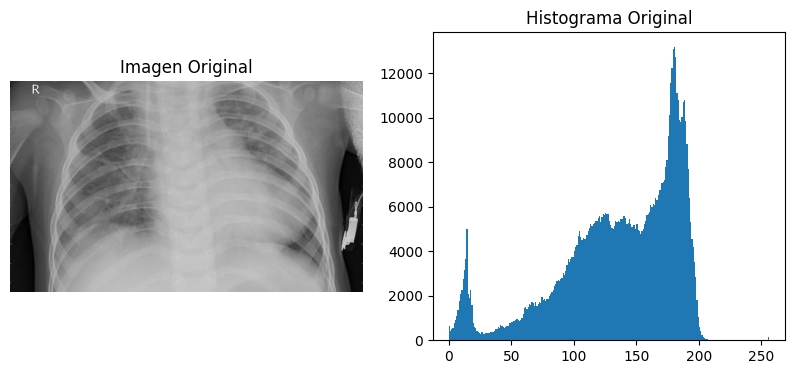

In [ ]:
# Cargar imagen médica en escala de grises
img = cv2.imread('Pneumonia2.jpeg', cv2.IMREAD_GRAYSCALE)

# Mostrar imagen original
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

# Histograma original
plt.subplot(1, 2, 2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Histograma Original")
plt.show()

<ipython-input-37-bf1c4a7c56bd>:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_eq.ravel(), 256, [0, 256])


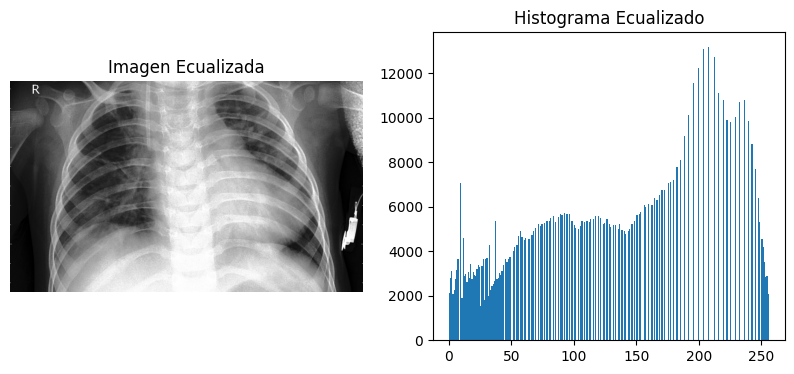

In [ ]:
# Ecualización de histograma
img_eq = cv2.equalizeHist(img)

# Mostrar imagen ecualizada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_eq, cmap='gray')
plt.title("Imagen Ecualizada")
plt.axis('off')

# Histograma ecualizado
plt.subplot(1, 2, 2)
plt.hist(img_eq.ravel(), 256, [0, 256])
plt.title("Histograma Ecualizado")
plt.show()

Resta entre imagen original y suavizada para resaltar bordes

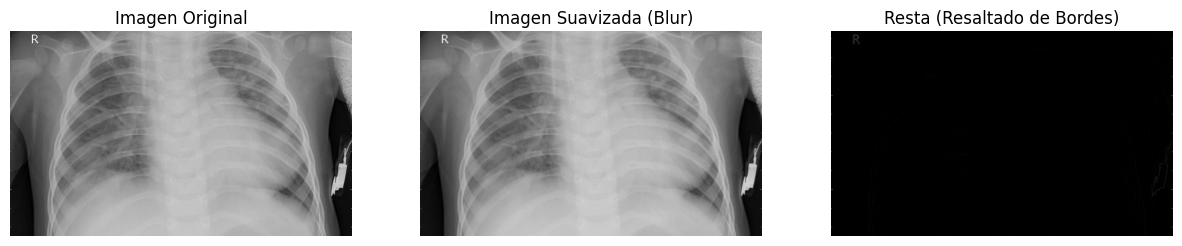

In [ ]:
# Suavizar la imagen con filtro Gaussiano
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Resta entre la imagen original y la suavizada
img_bordes = cv2.subtract(img, img_blur)

# Mostrar resultados
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_blur, cmap='gray')
plt.title("Imagen Suavizada (Blur)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_bordes, cmap='gray')
plt.title("Resta (Resaltado de Bordes)")
plt.axis('off')

plt.show()


Aplicación de máscaras binarias usando operaciones lógicas

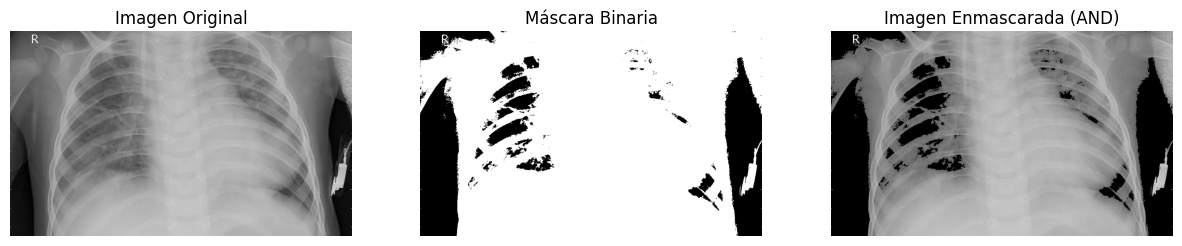

In [ ]:
# Crear una máscara binaria: por ejemplo, umbral fijo
_, mascara_binaria = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Aplicar una operación lógica AND para conservar solo zonas con máscara
img_enmascarada = cv2.bitwise_and(img, img, mask=mascara_binaria)

# Mostrar resultados
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mascara_binaria, cmap='gray')
plt.title("Máscara Binaria")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_enmascarada, cmap='gray')
plt.title("Imagen Enmascarada (AND)")
plt.axis('off')

plt.show()


Filtro de media

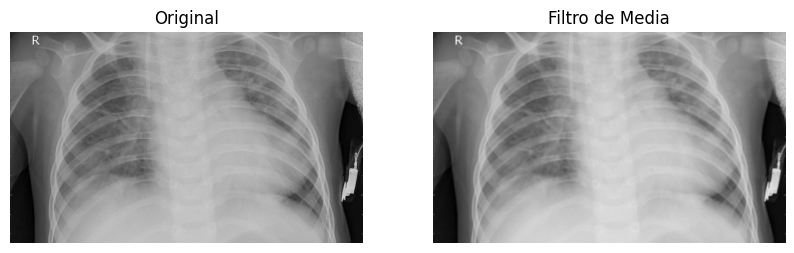

In [ ]:
# Filtro de media (kernel 5x5)
img_media = cv2.blur(img, (5, 5))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_media, cmap='gray')
plt.title("Filtro de Media")
plt.axis('off')
plt.show()

Filtro Gaussiano

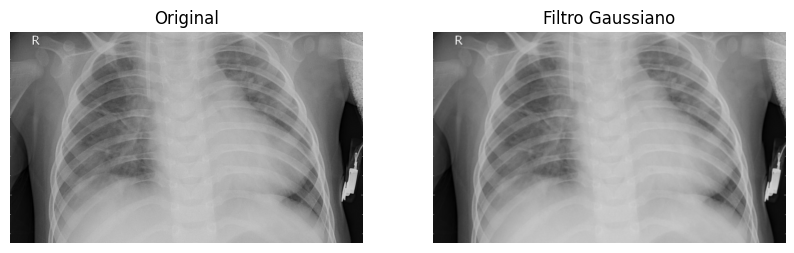

In [ ]:
# Filtro Gaussiano (más suave y natural que el de media)
img_gauss = cv2.GaussianBlur(img, (5, 5), 0)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gauss, cmap='gray')
plt.title("Filtro Gaussiano")
plt.axis('off')
plt.show()

Filtro Laplaciano


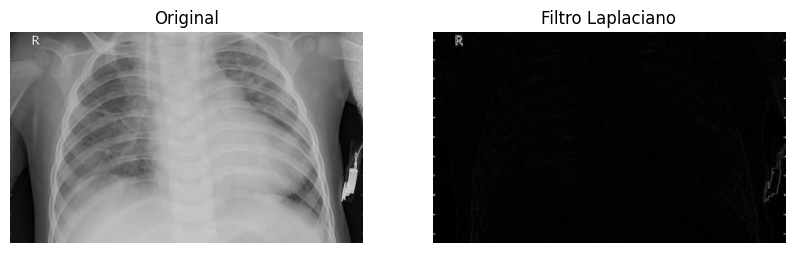

In [ ]:
# Filtro Laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # Para visualizar mejor

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title("Filtro Laplaciano")
plt.axis('off')
plt.show()

Filtro Sobel

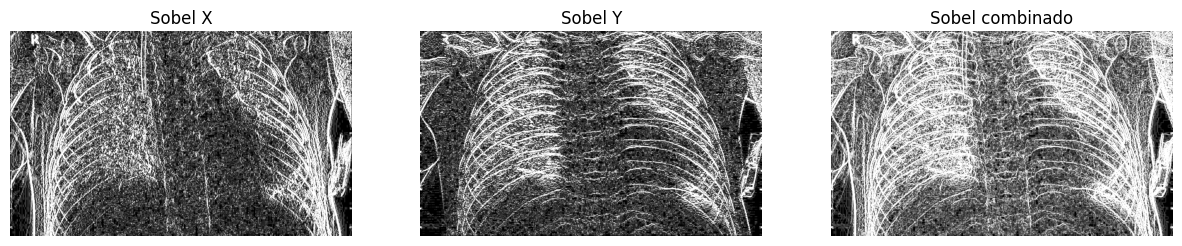

In [ ]:
# Filtro Sobel en X y Y
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Magnitud del gradiente (combinación)
sobel_comb = cv2.magnitude(sobelx, sobely)
sobel_comb = cv2.convertScaleAbs(sobel_comb)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_comb, cmap='gray')
plt.title("Sobel combinado")
plt.axis('off')

plt.show()

Umbral Fijo

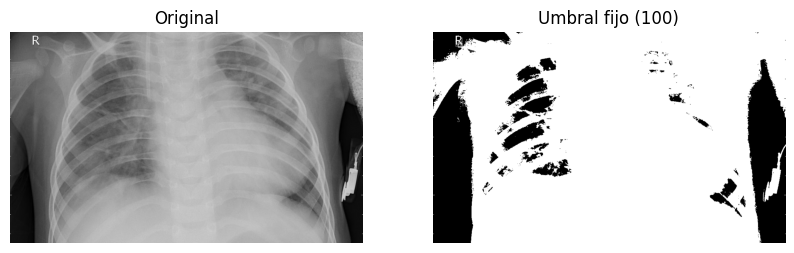

In [ ]:
# Umbral fijo
_, img_thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_thresh, cmap='gray')
plt.title("Umbral fijo (100)")
plt.axis('off')
plt.show()

Umbral Adaptativo

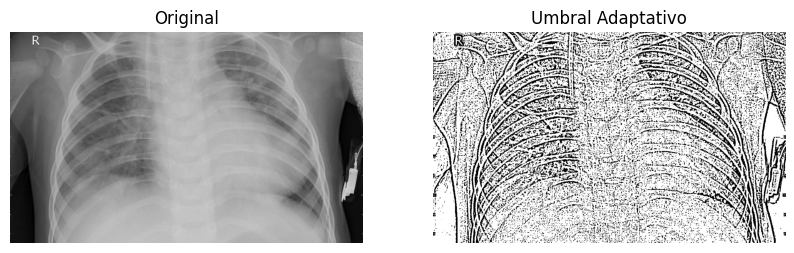

In [ ]:
# Umbral adaptativo (media local)
img_adapt = cv2.adaptiveThreshold(img, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,
                                  11, 2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_adapt, cmap='gray')
plt.title("Umbral Adaptativo")
plt.axis('off')
plt.show()


Control deslizante interactivo (en tiempo real)

In [ ]:
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

# Función que actualiza el umbral dinámicamente
def actualizar_umbral(thresh_value):
    _, img_binaria = cv2.threshold(img, thresh_value, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_binaria, cmap='gray')
    plt.title(f'Umbral = {thresh_value}')
    plt.axis('off')

    plt.show()

# Control deslizante interactivo
interact(actualizar_umbral, thresh_value=IntSlider(min=0, max=255, step=1, value=128))


interactive(children=(IntSlider(value=128, description='thresh_value', max=255), Output()), _dom_classes=('wid…

<function __main__.actualizar_umbral(thresh_value)>

Mostrar la magnitud del espectro de Fourier

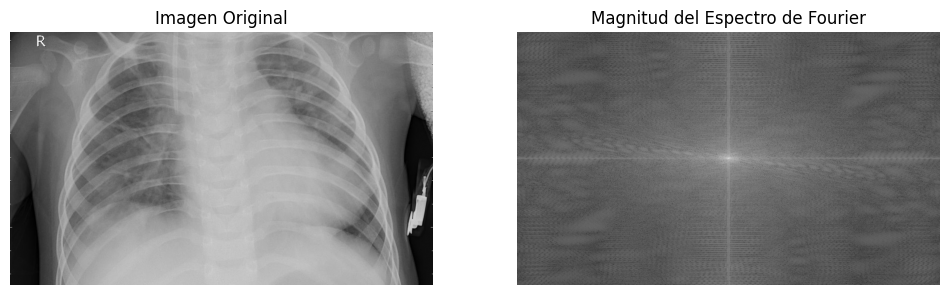

In [ ]:
# Transformada de Fourier en 2D
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Centramos el espectro
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Escalado logarítmico para visualización

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitud del Espectro de Fourier")
plt.axis('off')
plt.show()

Filtro en dominio de la frecuencia: eliminación de alta frecuencia

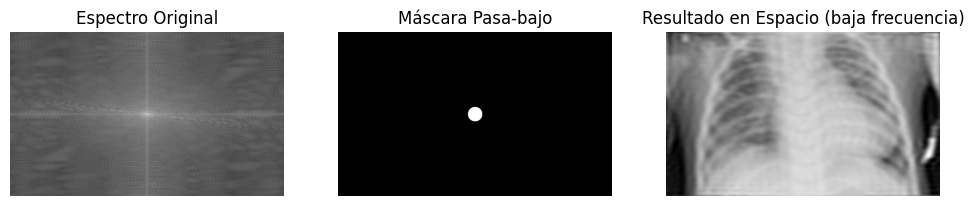

In [ ]:
# Creamos una máscara pasa-bajo (círculo central blanco)
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
r = 30  # radio del filtro pasa-bajo
cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

# Aplicamos la máscara al espectro
fshift_filtered = fshift * mask

# Transformamos de vuelta al dominio espacial
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Espectro Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask * 255, cmap='gray')
plt.title("Máscara Pasa-bajo")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title("Resultado en Espacio (baja frecuencia)")
plt.axis('off')

plt.show()
